In [1]:
import pandas as pd
from biological_fuzzy_logic_networks.DREAM_analysis.train_network import (create_bfz, 
                                                                          prepare_cell_line_data, 
                                                                          cl_data_to_input, 
                                                                          train_network)
from biological_fuzzy_logic_networks.draw import draw_BioFuzzNet
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import math
import numpy as np

/dccstor/ipc1/.conda/envs/biofuzznet2/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
sif_path = "/dccstor/ipc1/CAR/DREAM/DREAMdata/MEK_FAK_ERK.sif"
model = create_bfz(sif_path, network_class="dreambiofuzznet")

In [3]:
# draw_BioFuzzNet(model)

In [4]:
cl_file_path = ["/dccstor/ipc1/CAR/DREAM/DREAMdata/EFM192A.csv", "/dccstor/ipc1/CAR/DREAM/DREAMdata/184A1.csv"]
cl_data = prepare_cell_line_data(cl_file_path, root_nodes=["MEK12", "FAK"], add_root_values=False)

['EFM192A' '184A1']


In [5]:
cl_data

,treatment,cell_line,time,cellID,fileID,b-catenin,cleavedCas,CyclinB,GAPDH,IdU,...,PLCg2,RB,S6,p70S6K,SMAD23,SRC,STAT1,STAT3,STAT5,inhibitor
21992,EGF,EFM192A,9.0,1,1476,1.953906,3.281115,4.39654,2.312289,9.22012,...,1.416253,7.73152,4.11682,2.567413,2.522715,1.522210,2.71685,2.254183,2.09935,NaN
21993,EGF,EFM192A,9.0,2,1476,1.365771,0.898342,2.26044,3.683169,4.25020,...,3.774145,2.20794,7.67966,2.244049,1.950526,2.502591,3.72996,1.980777,1.94537,NaN
21994,EGF,EFM192A,9.0,3,1476,0.389169,2.663590,1.21848,1.099042,6.20769,...,2.015175,3.03555,6.14099,2.341697,1.071708,1.816983,3.16627,1.752911,2.26077,NaN
21995,EGF,EFM192A,9.0,4,1476,0.224784,2.077743,3.92934,0.565534,10.77694,...,1.542914,6.95008,2.88490,1.372812,0.931656,0.554053,1.09821,0.652426,1.95862,NaN
21996,EGF,EFM192A,9.0,5,1476,1.087655,0.898342,1.62983,0.941938,5.56073,...,1.242978,3.91831,5.52897,1.935433,0.551474,2.386022,2.43946,1.907202,1.54430,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338248,iPKC,184A1,9.0,4316,2673,1.332378,2.281643,1.40548,3.142252,5.57131,...,3.199781,5.28742,3.64104,2.383017,2.002440,1.612944,1.79230,3.984415,2.01180,PKC
338249,iPKC,184A1,9.0,4317,2673,0.751923,2.496208,3.88769,2.823635,11.54041,...,1.639470,5.85556,2.76271,2.744006,2.027867,0.855164,2.55957,3.039824,2.84401,PKC
338250,iPKC,184A1,9.0,4318,2673,0.224784,2.063067,1.20489,2.999854,4.25020,...,2.098686,5.67855,3.83548,1.490975,2.787514,0.675484,1.20277,3.820552,1.31772,PKC
338251,iPKC,184A1,9.0,4319,2673,1.203974,0.898342,2.32332,3.035365,4.36802,...,1.885177,3.84573,3.54376,2.671032,2.193984,1.802080,1.00021,3.565381,2.90517,PKC


In [6]:
train_cell_lines = ['EFM192A']
train_inhibitors = [np.nan, 'EGFR', 'PI3K', 'PKC']
cl_data.loc[
            (cl_data["cell_line"].isin(train_cell_lines))
            & (cl_data["inhibitor"].isin(train_inhibitors)), "inhibitor"].unique()

array([nan, 'EGFR', 'PI3K', 'PKC'], dtype=object)

In [7]:
(train_data,
valid_data,
train_inhibitors,
valid_inhibitors,
train_input,
valid_input,
train,
valid)= cl_data_to_input(cl_data, model, train_cell_lines="184A1")

Splitting based on train cell line(s)


/u/adr/Code/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/DREAM_analysis/utils.py:216: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[markers] = scaler.transform(train[markers])
/u/adr/Code/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/DREAM_analysis/utils.py:217: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid[markers] = scaler.transform(valid[markers])


In [8]:
valid["cell_line"].unique()

array(['EFM192A'], dtype=object)

In [9]:
train["cell_line"].unique()

array(['184A1'], dtype=object)

In [10]:
valid

,treatment,cell_line,time,cellID,fileID,b-catenin,cleavedCas,CyclinB,GAPDH,IdU,...,PLCg2,RB,S6,p70S6K,SMAD23,SRC,STAT1,STAT3,STAT5,inhibitor
21992,EGF,EFM192A,9.0,1,1476,1.953906,3.281115,4.39654,2.312289,9.22012,...,1.416253,7.73152,4.11682,2.567413,2.522715,1.522210,2.71685,2.254183,2.09935,NaN
21993,EGF,EFM192A,9.0,2,1476,1.365771,0.898342,2.26044,3.683169,4.25020,...,3.774145,2.20794,7.67966,2.244049,1.950526,2.502591,3.72996,1.980777,1.94537,NaN
21994,EGF,EFM192A,9.0,3,1476,0.389169,2.663590,1.21848,1.099042,6.20769,...,2.015175,3.03555,6.14099,2.341697,1.071708,1.816983,3.16627,1.752911,2.26077,NaN
21995,EGF,EFM192A,9.0,4,1476,0.224784,2.077743,3.92934,0.565534,10.77694,...,1.542914,6.95008,2.88490,1.372812,0.931656,0.554053,1.09821,0.652426,1.95862,NaN
21996,EGF,EFM192A,9.0,5,1476,1.087655,0.898342,1.62983,0.941938,5.56073,...,1.242978,3.91831,5.52897,1.935433,0.551474,2.386022,2.43946,1.907202,1.54430,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222373,EGF,EFM192A,9.0,5953,1573,0.850784,3.443948,2.99426,2.577004,4.25020,...,3.237629,6.19743,6.17955,0.872950,1.996234,2.481347,2.38174,2.483709,2.85239,NaN
222374,EGF,EFM192A,9.0,5954,1573,1.304103,2.166008,2.06073,2.902965,6.58362,...,3.163404,2.53094,7.29755,2.597048,2.473619,2.971518,3.08559,2.319403,2.87627,NaN
222375,EGF,EFM192A,9.0,5955,1573,1.219978,3.420009,1.20489,1.512723,4.85252,...,3.319073,4.71771,6.93293,2.254053,1.440855,1.942947,3.36708,2.237142,3.08781,NaN
222376,EGF,EFM192A,9.0,5956,1573,1.068121,3.825866,3.43746,4.100322,5.48798,...,2.383416,5.16076,5.48428,2.920180,2.723982,2.788774,3.30407,2.540673,2.40916,NaN


In [11]:
train

,treatment,cell_line,time,cellID,fileID,b-catenin,cleavedCas,CyclinB,GAPDH,IdU,...,PLCg2,RB,S6,p70S6K,SMAD23,SRC,STAT1,STAT3,STAT5,inhibitor
38130,EGF,184A1,9.0,1,2659,0.482728,3.517068,1.79822,2.948607,4.25020,...,1.660514,5.17354,4.26884,2.083694,2.712647,1.982984,1.39663,1.439317,1.97515,NaN
38131,EGF,184A1,9.0,1,2697,0.224784,2.180747,1.20489,2.909798,5.81348,...,1.798822,3.15913,3.37292,2.738713,2.732006,1.959692,2.36515,3.533007,2.52805,NaN
38132,EGF,184A1,9.0,2,2659,0.224784,2.034324,1.98249,2.212937,4.94338,...,2.318331,2.64285,4.39301,2.513373,0.901574,1.687628,2.50198,1.581080,2.71032,NaN
38133,EGF,184A1,9.0,2,2697,1.458715,3.486845,1.74992,2.884740,5.44500,...,1.726438,6.06689,3.97347,1.756698,2.975647,1.542124,1.39955,4.001512,1.58870,NaN
38134,EGF,184A1,9.0,3,2659,1.273878,2.752377,1.20489,3.412098,6.02208,...,1.201048,4.52981,4.97628,2.757858,0.551474,0.739021,2.26492,2.996218,2.64930,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338248,iPKC,184A1,9.0,4316,2673,1.332378,2.281643,1.40548,3.142252,5.57131,...,3.199781,5.28742,3.64104,2.383017,2.002440,1.612944,1.79230,3.984415,2.01180,PKC
338249,iPKC,184A1,9.0,4317,2673,0.751923,2.496208,3.88769,2.823635,11.54041,...,1.639470,5.85556,2.76271,2.744006,2.027867,0.855164,2.55957,3.039824,2.84401,PKC
338250,iPKC,184A1,9.0,4318,2673,0.224784,2.063067,1.20489,2.999854,4.25020,...,2.098686,5.67855,3.83548,1.490975,2.787514,0.675484,1.20277,3.820552,1.31772,PKC
338251,iPKC,184A1,9.0,4319,2673,1.203974,0.898342,2.32332,3.035365,4.36802,...,1.885177,3.84573,3.54376,2.671032,2.193984,1.802080,1.00021,3.565381,2.90517,PKC


In [12]:
train_network(
    pkn_sif = sif_path,
    network_class= "DreamBioFuzzNet",
    data_file= cl_file_path,
    output_dir="/dccstor/ipc1/CAR/DREAM/Model/Test/MEK_FAK_ERK/",
    time_point = 9,
    non_marker_cols = ["treatment", "cell_line", "time", "cellID", "fileID"],
    treatment_col_name = "treatment",
    minmaxscale = True,
    add_root_values  = False,
    input_value = 1,
    train_treatments = None,
    valid_treatments = None,
    train_cell_lines=["184A1"],
    learning_rate = 1e-3,
    n_epochs= 20,
    batch_size = 300,
    checkpoint_path = "/dccstor/ipc1/CAR/DREAM/Model/Test/MEK_FAK_ERK/"
)

['EFM192A' '184A1']
Splitting based on train cell line(s)


/u/adr/Code/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/DREAM_analysis/utils.py:216: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[markers] = scaler.transform(train[markers])
/u/adr/Code/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/DREAM_analysis/utils.py:217: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid[markers] = scaler.transform(valid[markers])
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

In [13]:
pd.DataFrame(train_data)

,ERK12,FAK,MEK12
0,0.462925,0.242359,0.470197
1,0.484729,0.342799,0.528816
2,0.562827,0.020950,0.573515
3,0.433534,0.048533,0.196050
4,0.386555,0.231252,0.428937
...,...,...,...
62380,0.463060,0.298939,0.576096
62381,0.437315,0.417675,0.597163
62382,0.369178,0.000000,0.433221
62383,0.368892,0.244959,0.536307


In [14]:
loss = pd.read_csv("/dccstor/ipc1/CAR/DREAM/Model/Test/MEK_FAK_ERK/loss.csv", index_col=0)
output = pd.read_csv("/dccstor/ipc1/CAR/DREAM/Model/Test/MEK_FAK_ERK/output_states.csv", index_col=0)
truth = pd.read_csv("/dccstor/ipc1/CAR/DREAM/Model/Test/MEK_FAK_ERK/valid_data.csv", index_col=0)
valid_inhibitors = pd.read_csv("/dccstor/ipc1/CAR/DREAM/Model/Test/MEK_FAK_ERK/valid_inhibitors.csv", index_col=0)

truth = truth[["MEK12", "FAK", "ERK12", "inhibitor"]].reset_index(drop=True)

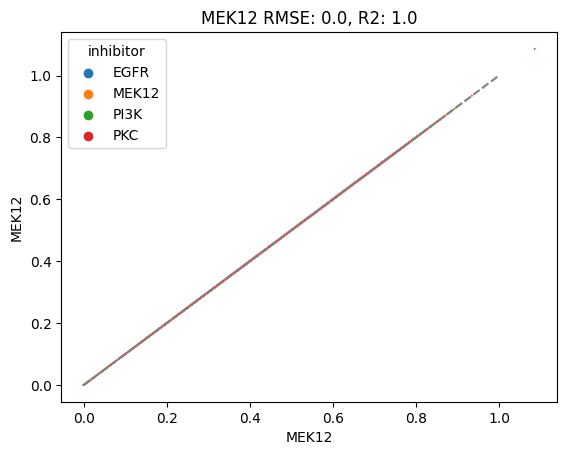

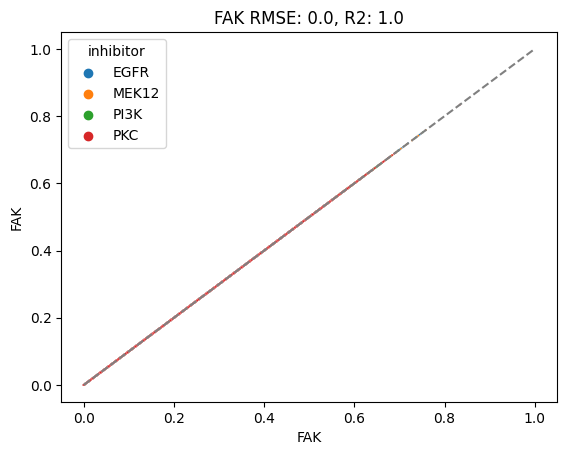

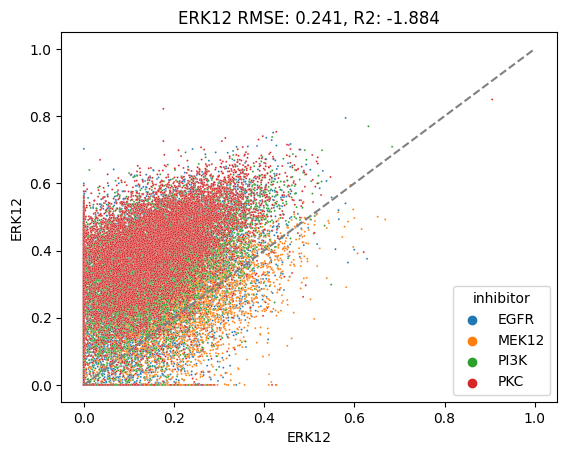

In [15]:
for i in output.columns:
    rmse = math.sqrt(sum((output[i] - truth[i])**2)/len(truth))
    r2 = r2_score(truth[i], output[i])
    sns.scatterplot(x = output[i], y=truth[i], hue=truth["inhibitor"], s=2)
    plt.title(f"{i} RMSE: {round(rmse, 3)}, R2: {round(r2, 3)}")
    plt.plot( [0,1],[0,1],  "--", color="grey" )
    plt.show()

In [16]:
# sns.lineplot(data=loss, x="time", y="loss", hue="phase")

In [17]:
cl_data

,treatment,cell_line,time,cellID,fileID,b-catenin,cleavedCas,CyclinB,GAPDH,IdU,...,PLCg2,RB,S6,p70S6K,SMAD23,SRC,STAT1,STAT3,STAT5,inhibitor
21992,EGF,EFM192A,9.0,1,1476,1.953906,3.281115,4.39654,2.312289,9.22012,...,1.416253,7.73152,4.11682,2.567413,2.522715,1.522210,2.71685,2.254183,2.09935,NaN
21993,EGF,EFM192A,9.0,2,1476,1.365771,0.898342,2.26044,3.683169,4.25020,...,3.774145,2.20794,7.67966,2.244049,1.950526,2.502591,3.72996,1.980777,1.94537,NaN
21994,EGF,EFM192A,9.0,3,1476,0.389169,2.663590,1.21848,1.099042,6.20769,...,2.015175,3.03555,6.14099,2.341697,1.071708,1.816983,3.16627,1.752911,2.26077,NaN
21995,EGF,EFM192A,9.0,4,1476,0.224784,2.077743,3.92934,0.565534,10.77694,...,1.542914,6.95008,2.88490,1.372812,0.931656,0.554053,1.09821,0.652426,1.95862,NaN
21996,EGF,EFM192A,9.0,5,1476,1.087655,0.898342,1.62983,0.941938,5.56073,...,1.242978,3.91831,5.52897,1.935433,0.551474,2.386022,2.43946,1.907202,1.54430,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338248,iPKC,184A1,9.0,4316,2673,1.332378,2.281643,1.40548,3.142252,5.57131,...,3.199781,5.28742,3.64104,2.383017,2.002440,1.612944,1.79230,3.984415,2.01180,PKC
338249,iPKC,184A1,9.0,4317,2673,0.751923,2.496208,3.88769,2.823635,11.54041,...,1.639470,5.85556,2.76271,2.744006,2.027867,0.855164,2.55957,3.039824,2.84401,PKC
338250,iPKC,184A1,9.0,4318,2673,0.224784,2.063067,1.20489,2.999854,4.25020,...,2.098686,5.67855,3.83548,1.490975,2.787514,0.675484,1.20277,3.820552,1.31772,PKC
338251,iPKC,184A1,9.0,4319,2673,1.203974,0.898342,2.32332,3.035365,4.36802,...,1.885177,3.84573,3.54376,2.671032,2.193984,1.802080,1.00021,3.565381,2.90517,PKC


In [18]:
output

,MEK12,FAK,ERK12
0,0.599389,0.267805,0.160361
1,0.497680,0.079973,0.039151
2,0.572135,0.363544,0.207776
3,0.541045,0.115803,0.062398
4,0.422995,0.103171,0.043328
...,...,...,...
47988,0.545410,0.510141,0.277905
47989,0.644577,0.552545,0.355889
47990,0.574466,0.589983,0.338575
47991,0.516521,0.000000,0.000000


In [19]:
import torch
import networkx as nx
# torch.save({
#             'epoch': 20,
#             'model_state_dict': model.state_dict(),
# #             'optimizer_state_dict': optimizer.state_dict(),
# #             'loss': LOSS,
#             }, "/dccstor/ipc1/CAR/DREAM/Model/Test/MEK_FAK_ERK/model.pt")

In [20]:
temp = model.edges()["MEK12", "MEK_and_FAK"]["layer"]
temp.state_dict()

OrderedDict([('n', tensor([-1.1413])), ('K', tensor([-1.2805]))])

In [21]:
ml = torch.nn.ModuleDict({f"{edge[0]}@@@{edge[1]}": model.edges()[edge]["layer"] for edge in model.transfer_edges})
ml.state_dict()

OrderedDict([('MEK12@@@MEK_and_FAK.n', tensor([-1.1413])),
             ('MEK12@@@MEK_and_FAK.K', tensor([-1.2805])),
             ('FAK@@@MEK_and_FAK.n', tensor([-1.2415])),
             ('FAK@@@MEK_and_FAK.K', tensor([-1.2840]))])

In [22]:
new_model = create_bfz(sif_path, network_class="dreambiofuzznet")

In [23]:
new_model.edges(data=True)

OutEdgeDataView([('MEK12', 'MEK_and_FAK', {'edge_type': 'transfer_function', 'layer': HillTransferFunction(), 'weight': 1}), ('MEK_and_FAK', 'ERK12', {'edge_type': 'simple', 'weight': 1}), ('FAK', 'MEK_and_FAK', {'edge_type': 'transfer_function', 'layer': HillTransferFunction(), 'weight': 1})])

In [24]:
ml2 = torch.nn.ModuleDict({f"{edge[0]}@@@{edge[1]}": new_model.edges()[edge]["layer"] for edge in new_model.transfer_edges})
ml2.state_dict()

OrderedDict([('MEK12@@@MEK_and_FAK.n', tensor([-0.0895])),
             ('MEK12@@@MEK_and_FAK.K', tensor([-0.8601])),
             ('FAK@@@MEK_and_FAK.n', tensor([-0.3822])),
             ('FAK@@@MEK_and_FAK.K', tensor([-0.5025]))])

In [25]:
edge_att = {(k.split("@@@")[0], k.split("@@@")[1]): {"layer": v} for k, v in ml.items()}
edge_att

{('MEK12', 'MEK_and_FAK'): {'layer': HillTransferFunction()},
 ('FAK', 'MEK_and_FAK'): {'layer': HillTransferFunction()}}

In [26]:
nx.set_edge_attributes(new_model, edge_att)

In [27]:
ml2 = torch.nn.ModuleDict({f"{edge[0]}@@@{edge[1]}": new_model.edges()[edge]["layer"] for edge in new_model.transfer_edges})
ml2.state_dict()

OrderedDict([('MEK12@@@MEK_and_FAK.n', tensor([-1.1413])),
             ('MEK12@@@MEK_and_FAK.K', tensor([-1.2805])),
             ('FAK@@@MEK_and_FAK.n', tensor([-1.2415])),
             ('FAK@@@MEK_and_FAK.K', tensor([-1.2840]))])

In [28]:
new_model.edges(data=True)

OutEdgeDataView([('MEK12', 'MEK_and_FAK', {'edge_type': 'transfer_function', 'layer': HillTransferFunction(), 'weight': 1}), ('MEK_and_FAK', 'ERK12', {'edge_type': 'simple', 'weight': 1}), ('FAK', 'MEK_and_FAK', {'edge_type': 'transfer_function', 'layer': HillTransferFunction(), 'weight': 1})])

In [29]:
checkpoint = torch.load("/dccstor/ipc1/CAR/DREAM/Model/Test/MEK_FAK_ERK/model.pt")
module_dict = torch.nn.ModuleDict({f"{edge[0]}@@@{edge[1]}": new_model.edges()[edge]["layer"] for edge in new_model.transfer_edges})
module_dict.load_state_dict(checkpoint["model_state_dict"])
edge_att = {(k.split("@@@")[0], k.split("@@@")[1]): {"layer": v} for k, v in module_dict.items()}
edge_att

{('MEK12', 'MEK_and_FAK'): {'layer': HillTransferFunction()},
 ('FAK', 'MEK_and_FAK'): {'layer': HillTransferFunction()}}

In [30]:
nx.set_edge_attributes(new_model, edge_att)

In [31]:
ml2 = torch.nn.ModuleDict({f"{edge[0]}@@@{edge[1]}": new_model.edges()[edge]["layer"] for edge in new_model.transfer_edges})
ml2.state_dict()

OrderedDict([('MEK12@@@MEK_and_FAK.n', tensor([1.0007])),
             ('MEK12@@@MEK_and_FAK.K', tensor([-3.0827])),
             ('FAK@@@MEK_and_FAK.n', tensor([1.4957])),
             ('FAK@@@MEK_and_FAK.K', tensor([-3.4663]))])

In [32]:
checkpoint["model_state_dict"]

OrderedDict([('MEK12@@@MEK_and_FAK.n', tensor([1.0007])),
             ('MEK12@@@MEK_and_FAK.K', tensor([-3.0827])),
             ('FAK@@@MEK_and_FAK.n', tensor([1.4957])),
             ('FAK@@@MEK_and_FAK.K', tensor([-3.4663]))])

In [33]:
ml2

ModuleDict(
  (MEK12@@@MEK_and_FAK): HillTransferFunction()
  (FAK@@@MEK_and_FAK): HillTransferFunction()
)

In [34]:
checkpoint["model_state_dict"]

OrderedDict([('MEK12@@@MEK_and_FAK.n', tensor([1.0007])),
             ('MEK12@@@MEK_and_FAK.K', tensor([-3.0827])),
             ('FAK@@@MEK_and_FAK.n', tensor([1.4957])),
             ('FAK@@@MEK_and_FAK.K', tensor([-3.4663]))])

In [35]:
for edge in new_model.transfer_edges:
    print(new_model.edges()[edge]["layer"].K, new_model.edges()[edge]["layer"].n)

Parameter containing:
tensor([-3.0827], requires_grad=True) Parameter containing:
tensor([1.0007], requires_grad=True)
Parameter containing:
tensor([-3.4663], requires_grad=True) Parameter containing:
tensor([1.4957], requires_grad=True)


In [36]:
new_model2 = create_bfz(sif_path, network_class="dreambiofuzznet")

In [37]:
for edge in new_model2.transfer_edges:
    print(new_model2.edges()[edge]["layer"].K, new_model2.edges()[edge]["layer"].n)

Parameter containing:
tensor([-0.1036], requires_grad=True) Parameter containing:
tensor([-1.6998], requires_grad=True)
Parameter containing:
tensor([-0.1730], requires_grad=True) Parameter containing:
tensor([-1.5190], requires_grad=True)


In [38]:
new_model2.load_from_checkpoint(checkpoint["model_state_dict"])

In [39]:
for edge in new_model2.transfer_edges:
    print(new_model2.edges()[edge]["layer"].K, new_model2.edges()[edge]["layer"].n)

Parameter containing:
tensor([-3.0827], requires_grad=True) Parameter containing:
tensor([1.0007], requires_grad=True)
Parameter containing:
tensor([-3.4663], requires_grad=True) Parameter containing:
tensor([1.4957], requires_grad=True)
